In [2]:
# import necessary libraries    
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression   
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures    


In [3]:
! pip install pycaret   

In [8]:
# Importing dataset 
data = pd.read_csv('data_sepsis.csv')

In [4]:
data.head() 

,AAMDC,AASDHPPT,ABAT,ABCB10,ABCC2,ABCC4,ABCC9,ABCD3,ABCF1,ABHD13,...,ZSCAN2,ZSCAN29,ZSCAN32,ZSWIM8,ZW10,ZYG11B,ZZZ3,Sex,Age,Mortality
0,7.302388,6.915275,3.880092,7.265628,3.524147,7.643898,4.941341,6.194789,6.798725,3.103448,...,4.501835,4.688715,7.762803,10.065096,7.719833,10.124158,7.126248,male,70,Dead
1,6.542649,6.049383,4.261556,6.668126,6.440577,8.045913,4.633716,5.779594,6.607670,4.384160,...,3.623360,5.467375,7.823195,10.677917,7.011917,10.424676,6.418867,male,64,Survived
2,6.988663,6.311620,5.817879,7.171268,4.780891,7.651797,3.805097,5.748838,6.802868,5.203732,...,5.544115,5.294168,7.761181,10.109725,7.519756,10.265863,6.998565,male,47,Survived
3,7.150255,6.560918,4.827277,7.124046,3.199669,7.161897,4.001520,5.872608,6.694096,3.056027,...,4.651321,4.865155,7.904202,9.781929,7.766247,9.663125,7.105418,female,71,Survived
4,6.509508,6.592467,5.487019,6.648482,3.878681,7.776908,4.488685,6.216506,6.082014,4.766600,...,3.046281,4.754909,8.046215,10.336220,6.798046,9.955113,6.572653,male,45,Survived


In [6]:
data.shape

(768, 3203)

In [7]:
# information about the data columns    
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Columns: 3203 entries, AAMDC to Mortality
dtypes: float64(3200), int64(1), object(2)
memory usage: 18.8+ MB


In [8]:
# checking for missing values   
data.isnull().sum() 

AAMDC        0
AASDHPPT     0
ABAT         0
ABCB10       0
ABCC2        0
            ..
ZYG11B       0
ZZZ3         0
Sex          1
Age          0
Mortality    0
Length: 3203, dtype: int64

In [9]:
# statistical measures of the data  
data.describe() 

,AAMDC,AASDHPPT,ABAT,ABCB10,ABCC2,ABCC4,ABCC9,ABCD3,ABCF1,ABHD13,...,ZRANB1,ZRANB2,ZSCAN2,ZSCAN29,ZSCAN32,ZSWIM8,ZW10,ZYG11B,ZZZ3,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,5.802189,5.501870,6.529969,6.298734,4.774065,5.975993,5.699479,5.575858,10.678446,4.851369,...,8.491417,7.529493,4.091797,6.234869,6.617057,25.839282,5.729323,9.357473,5.448706,62.032552
std,1.882366,2.004491,3.050841,2.288887,1.882708,2.331520,4.717395,1.898993,12.400496,2.036022,...,3.577360,2.872642,2.023379,2.693140,1.819765,45.552605,2.371106,3.600531,2.298791,16.717695
min,0.225310,0.000000,0.461819,0.000000,0.000000,0.000000,0.539796,0.000000,0.408188,0.000000,...,3.255223,0.682231,0.000000,0.382335,0.090512,4.034890,0.000000,0.918638,0.000000,17.000000
25%,4.137390,5.464955,5.434503,6.110750,4.036568,4.710417,4.152126,5.418478,6.208220,4.002699,...,7.277305,6.864040,3.806904,4.862905,6.079313,8.976762,4.492719,7.586011,5.050414,52.000000
50%,6.639377,6.215806,6.143348,7.174842,5.176482,6.880457,4.557100,6.025495,6.840739,4.519588,...,7.801256,7.245249,4.409176,5.504953,7.355235,10.128951,6.918483,9.943198,6.362551,65.000000
75%,7.121406,6.687174,7.058788,7.599177,5.867570,7.557085,5.619988,6.579970,7.384388,5.439567,...,8.546586,7.673071,4.979948,7.182490,7.787006,10.592313,7.540055,10.420546,6.939282,76.000000
max,12.189492,7.581547,37.489168,21.352588,7.918032,10.996449,78.802246,13.331327,107.002782,14.878031,...,33.374633,40.298113,7.564014,36.964950,11.965684,293.963625,8.544782,61.848673,8.259755,92.000000


In [10]:
# check for missing values
data.isnull().sum()

AAMDC        0
AASDHPPT     0
ABAT         0
ABCB10       0
ABCC2        0
            ..
ZYG11B       0
ZZZ3         0
Sex          1
Age          0
Mortality    0
Length: 3203, dtype: int64

In [11]:
# drop the missing values   
data = data.dropna()    



In [12]:
# Summary statistics
data.describe()


,AAMDC,AASDHPPT,ABAT,ABCB10,ABCC2,ABCC4,ABCC9,ABCD3,ABCF1,ABHD13,...,ZRANB1,ZRANB2,ZSCAN2,ZSCAN29,ZSCAN32,ZSWIM8,ZW10,ZYG11B,ZZZ3,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,...,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,5.800542,5.500480,6.529503,6.297635,4.772691,5.975072,5.701271,5.573498,10.682858,4.847194,...,8.491153,7.527663,4.089805,6.235290,6.617203,25.864422,5.730218,9.359542,5.446908,62.052151
std,1.883041,2.005428,3.052804,2.290178,1.883552,2.332901,4.720212,1.899105,12.407985,2.034060,...,3.579686,2.874068,2.023946,2.694872,1.820948,45.576997,2.372523,3.602423,2.299751,16.719773
min,0.225310,0.000000,0.461819,0.000000,0.000000,0.000000,0.539796,0.000000,0.408188,0.000000,...,3.255223,0.682231,0.000000,0.382335,0.090512,4.034890,0.000000,0.918638,0.000000,17.000000
25%,4.129800,5.464313,5.434262,6.110738,4.033939,4.708282,4.151419,5.416827,6.203343,4.002482,...,7.276071,6.863325,3.800658,4.860655,6.078536,8.990465,4.491136,7.584234,5.049214,52.000000
50%,6.638765,6.215113,6.141522,7.174982,5.175787,6.883158,4.558495,6.024649,6.840712,4.518962,...,7.800771,7.244326,4.408621,5.497787,7.356230,10.130750,6.919057,9.943490,6.360226,65.000000
75%,7.122387,6.690736,7.058872,7.599345,5.868850,7.557290,5.636975,6.574262,7.385532,5.410853,...,8.543273,7.668594,4.976258,7.182734,7.787283,10.592919,7.540162,10.421179,6.940768,76.000000
max,12.189492,7.581547,37.489168,21.352588,7.918032,10.996449,78.802246,13.331327,107.002782,14.878031,...,33.374633,40.298113,7.564014,36.964950,11.965684,293.963625,8.544782,61.848673,8.259755,92.000000


In [ ]:
# summarize the categorical data
data.describe(include='object') 

,Sex,Mortality
count,767,767
unique,2,2
top,male,Survived
freq,442,552


In [13]:
from pycaret.classification import *

# Setup the PyCaret environment
model = setup(data=data, target='Mortality', session_id=123)

# Compare models
best_models = compare_models(sort='Accuracy')  # Default is accuracy; you can sort by precision, recall, etc.

# Display additional metrics for the best model
print("Best Model Comparison Complete")


,Description,Value
0,Session id,123
1,Target,Mortality
2,Target type,Binary
3,Target mapping,"Dead: 0, Survived: 1"
4,Original data shape,"(768, 3203)"
5,Transformed data shape,"(768, 3203)"
6,Transformed train set shape,"(537, 3203)"
7,Transformed test set shape,"(231, 3203)"
8,Numeric features,3201
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7727,0.7429,0.7727,0.7619,0.7462,0.3401,0.3723,5.2930
et,Extra Trees Classifier,0.7708,0.7133,0.7708,0.7672,0.7303,0.2957,0.3520,1.3900
lightgbm,Light Gradient Boosting Machine,0.7653,0.7495,0.7653,0.7499,0.7344,0.3064,0.3405,4.0830
rf,Random Forest Classifier,0.7616,0.7177,0.7616,0.7569,0.7191,0.2667,0.3235,1.6220
gbc,Gradient Boosting Classifier,0.7578,0.7400,0.7578,0.7476,0.7248,0.2825,0.3238,9.7920
ada,Ada Boost Classifier,0.7411,0.6628,0.7411,0.7253,0.7213,0.2828,0.2990,3.0160
lr,Logistic Regression,0.7243,0.6910,0.7243,0.7156,0.7184,0.2903,0.2920,2.9900
knn,K Neighbors Classifier,0.7206,0.6564,0.7206,0.6981,0.6978,0.2188,0.2336,1.4230
dummy,Dummy Classifier,0.7206,0.5000,0.7206,0.5193,0.6037,0.0000,0.0000,1.4710
ridge,Ridge Classifier,0.6890,0.6664,0.6890,0.7050,0.6948,0.2626,0.2649,1.3180


Best Model Comparison Complete


In [14]:
tuned_model = tune_model(best_models)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7675,0.7778,0.8301,0.7185,0.2653,0.3911
1,0.7778,0.8188,0.7778,0.8301,0.7185,0.2653,0.3911
2,0.7593,0.7402,0.7593,0.8194,0.6844,0.1818,0.3162
3,0.7407,0.7675,0.7407,0.8092,0.6470,0.0935,0.2215
4,0.7222,0.6256,0.7222,0.6733,0.6590,0.1060,0.1403
5,0.7593,0.6530,0.7593,0.7419,0.7201,0.2642,0.3070
6,0.7407,0.8120,0.7407,0.8092,0.6470,0.0935,0.2215
7,0.6981,0.5088,0.6981,0.5102,0.5895,-0.0367,-0.0871
8,0.8302,0.8544,0.8302,0.8627,0.8028,0.4887,0.5687


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


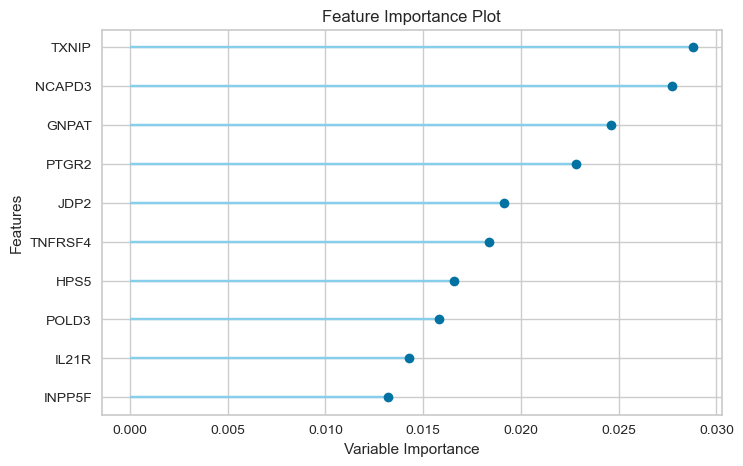

In [15]:
plot_model(best_models, plot='feature')  # Visualize important features
